In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import ast
import shutil

In [16]:
train_images = "../input/table-tennis-ball-position-detection-dataset/openttgames/openttgames/images/train/"
test_images = "../input/table-tennis-ball-position-detection-dataset/openttgames/openttgames/images/test/"
train_labels = "../input/table-tennis-ball-position-detection-dataset/openttgames/openttgames/labels/train/"
test_labels = "../input/table-tennis-ball-position-detection-dataset/openttgames/openttgames/labels/test/"

image_name = "1000_2.png"
image = cv2.imread(train_images + image_name, cv2.IMREAD_COLOR)
print(train_images + image_name)

../input/table-tennis-ball-position-detection-dataset/openttgames/openttgames/images/train/1000_2.png


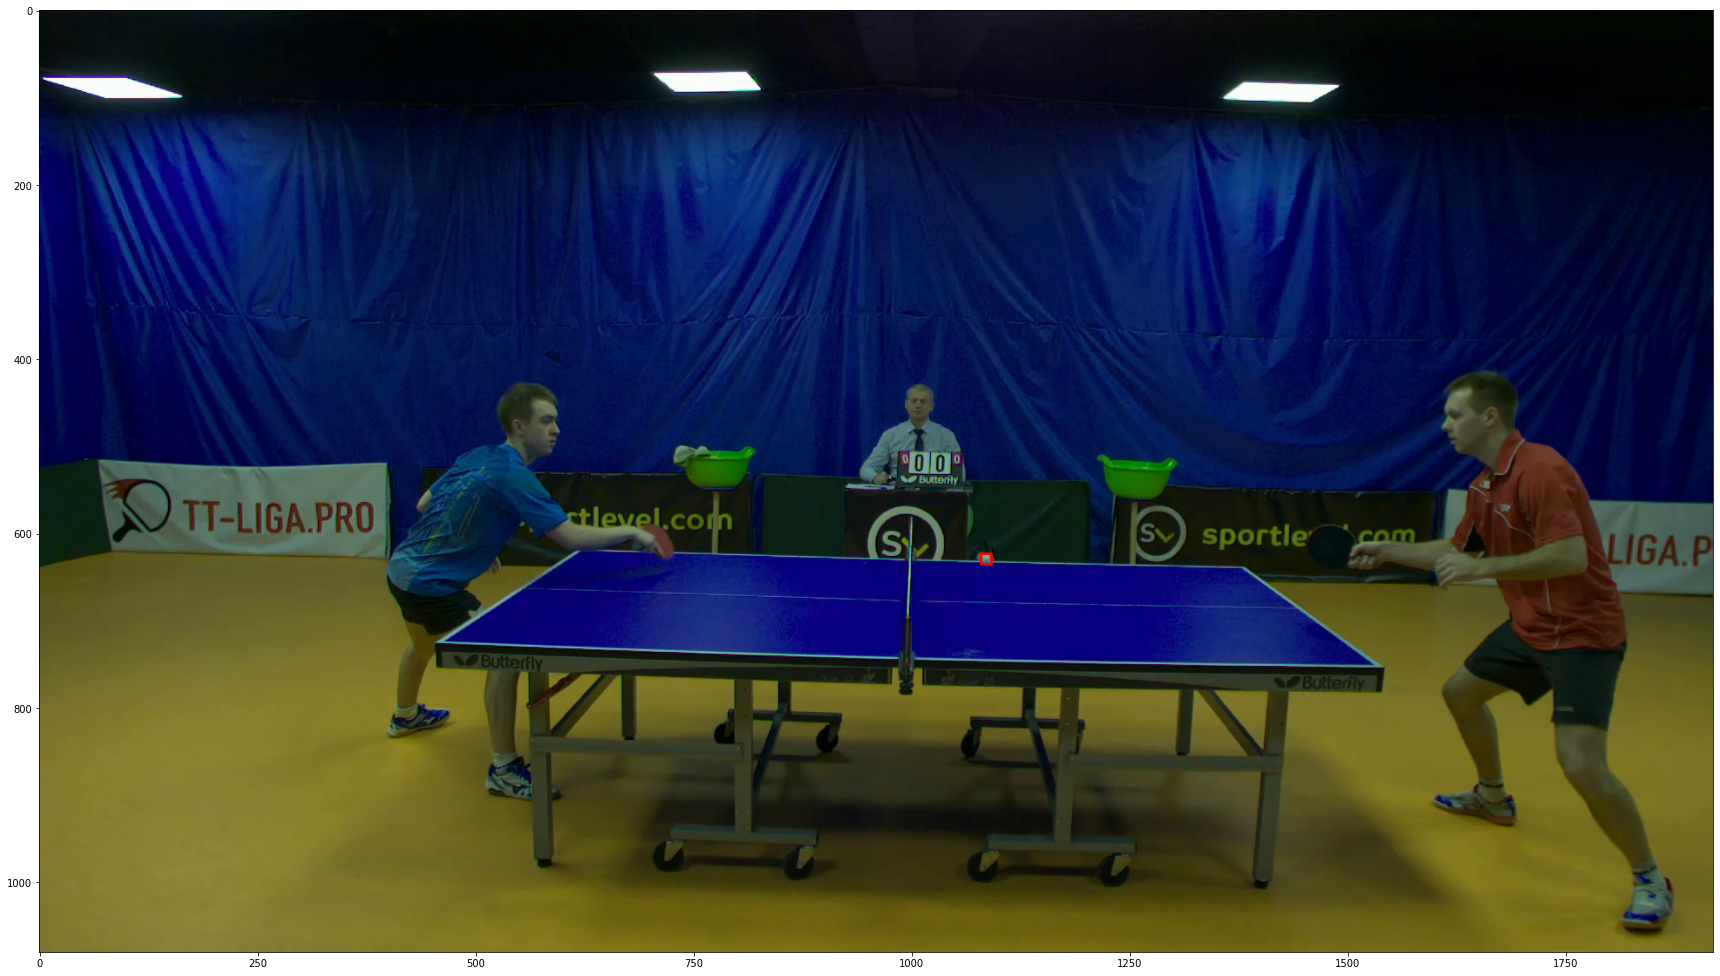

In [3]:
# YOLO format <object-class> <x> <y> <width> <height>
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

width = image_rgb.shape[1]
height = image_rgb.shape[0]

with open(train_labels + image_name[:-4] + ".txt") as label:
    data = map(float, label.readline().split())
    list_of_yolo_data = list(data)

if list_of_yolo_data:
    # For rectangle
    x1 = int(width * list_of_yolo_data[1] - width * list_of_yolo_data[3] / 2)
    y1 = int(height * list_of_yolo_data[2] - height * list_of_yolo_data[4] / 2)
    x2 = int(width * list_of_yolo_data[1] + width * list_of_yolo_data[3] / 2)
    y2 = int(height * list_of_yolo_data[2] + height * list_of_yolo_data[4] / 2)
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
   

fig, ax = plt.subplots(figsize=(30,30))
ax.imshow(image_rgb)

# **YOLO v5 installation and preparing**
**Import of important libraries and methods**

In [4]:
import torch
from IPython.display import Image, clear_output

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'GPU'})")


Setup complete. Using torch 1.11.0 (Tesla P100-PCIE-16GB)


In [5]:
# clone repo
!git clone https://github.com/ultralytics/yolov5.git  

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [23]:
# change the working directory to yolov5
%cd yolov5
os.chdir('/kaggle/working/yolov5')


# install dependencies
%pip install -qr requirements.txt 

# Change the working directory back to /kaggle/working/
os.chdir('/kaggle/working/')

!pwd

/kaggle/working/yolov5
Note: you may need to restart the kernel to use updated packages.
/kaggle/working


In [24]:
os.chdir('/kaggle/working/yolov5')

!pwd

/kaggle/working/yolov5


In [ ]:
# Create a new directory (this is happening inside the yolov5 directory)

base_dir = 'base_dir'
os.mkdir(base_dir)

In [ ]:
# images
images = os.path.join(base_dir, 'images')
os.mkdir(images)

# labels
labels = os.path.join(base_dir, 'labels')
os.mkdir(labels)

# Inside each folder we create seperate folders for each class

# create new folders inside images
train = os.path.join(images, 'train')
os.mkdir(train)
test = os.path.join(images, 'test')
os.mkdir(test)


# create new folders inside labels
train = os.path.join(labels, 'train')
os.mkdir(train)
test = os.path.join(labels, 'test')
os.mkdir(test)

# .yaml file making for the second set of images

In [27]:
yaml_dict = {'train': 'base_dir/images/train',   # path to the train folder
             'val': 'base_dir/images/test',      # path to the test folder
             'nc': 1,                            # number of classes
             'names': ['ball']}                  # list of label names

In [28]:
import yaml

with open(r'openttgames.yaml', 'w') as file:
    documents = yaml.dump(yaml_dict, file)

In [29]:
! cat 'openttgames.yaml'

names:
- ball
nc: 1
train: base_dir/images/train
val: base_dir/images/test


In [30]:
os.chdir('/kaggle/working')


In [31]:
train_image_files = os.listdir(train_images)
test_image_files = os.listdir(test_images)

train_label_files = os.listdir(train_labels)
test_label_files = os.listdir(test_labels)

v1_file_counter = 0
v2_file_counter = 0
v3_file_counter = 0
#game_file_counter = 0

for file in train_image_files:
    if "_2" in file:
        v2_file_counter += 1
    elif "_3" in file:
        v3_file_counter += 1    
    else:
        v1_file_counter += 1
        
for file in test_image_files:
    if "_2" in file:
        v2_file_counter += 1
    elif "_3" in file:
        v3_file_counter += 1    
    else:
        v1_file_counter += 1
        
print("Number of input files: ", len(train_image_files) + len(test_image_files))
print("First game files quantity: ", v1_file_counter)
print("Second game files quantity: ", v2_file_counter)
print("Third game files quantity: ", v3_file_counter)

Number of input files:  33989
First game files quantity:  7686
Second game files quantity:  18223
Third game files quantity:  8080


In [32]:
v3_train_images = []
v3_test_images = []

v3_train_labels = []
v3_test_labels = []

for file in train_image_files:
    if "_3" in file:
        v3_train_images.append(file)
        
for file in test_image_files:
    if "_3" in file:
        v3_test_images.append(file)
    
for file in train_label_files:
    if "_3" in file:
        v3_train_labels.append(file)
        
for file in test_label_files:
    if "_3" in file:
        v3_test_labels.append(file)
        
print(len(v3_train_images))
print(len(v3_test_images))
print(len(v3_train_labels))
print(len(v3_test_labels))

7275
805
7161
798


In [33]:
images_without_labels = []

for image_file in v3_train_images:
    label_file = image_file[:-4] + ".txt"
    if label_file not in v3_train_labels:
        images_without_labels.append(image_file)
        v3_train_images.remove(image_file)
print("Train images without labels: ", len(images_without_labels))


for image_file in v3_test_images:
    label_file = image_file[:-4] + ".txt"
    if label_file not in v3_test_labels:
        images_without_labels.append(image_file)
        v3_test_images.remove(image_file)
print("Test images without labels: ", len(images_without_labels))

Train images without labels:  112
Test images without labels:  118


In [34]:
# checking
print(len(v3_train_images))
print(len(v3_test_images))
print(len(v3_train_labels))
print(len(v3_test_labels))

7163
799
7161
798


In [ ]:
for i in v3_train_images:
    shutil.copyfile(train_images + i, "/kaggle/working/yolov5/base_dir/images/train/" + i)
    
for i in v3_train_labels:
    shutil.copyfile(train_labels + i, "/kaggle/working/yolov5/base_dir/labels/train/" + i)
    
for i in v3_test_images:
    shutil.copyfile(test_images + i, "/kaggle/working/yolov5/base_dir/images/test/" + i)
    
for i in v3_test_labels:
    shutil.copyfile(test_labels + i, "/kaggle/working/yolov5/base_dir/labels/test/" + i)

In [36]:
# Install W&B 
!pip install -q --upgrade wandb

# Login 
import wandb
wandb.login()

wandb: Currently logged in as: hannasholotiuk. Use `wandb login --relogin` to force relogin


True

In [37]:
os.chdir('/kaggle/working/yolov5/')

!python train.py --batch 50\
                 --epochs 10 \
                 --freeze 10 \
                 --data /kaggle/working/yolov5/openttgames.yaml \
                 --name yolov5_training3 \
                 --workers 2 \
                 --project table-tennis-yolov5_video3

wandb: Currently logged in as: hannasholotiuk. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/yolov5/openttgames.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=50, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=table-tennis-yolov5_video3, name=yolov5_training3, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-53-gf0e5a60 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momen

In [46]:
import shutil
shutil.make_archive("weights", 'zip', "table-tennis-yolov5_video3/yolov5_training32/weights" )

'/kaggle/working/yolov5/weights.zip'

In [67]:
!python detect.py --weights table-tennis-yolov5_video3/yolov5_training32/weights/best.pt \
                  --conf 0.25 \
                  --source /kaggle/working/yolov5/base_dir/images/test \
                  --save-txt \
                  --max-det 1 \
                  --save-conf \
                  --exist-ok \
                  --project table-tennis-yolov5_video3
                  

detect: weights=['table-tennis-yolov5_video3/yolov5_training32/weights/best.pt'], source=/kaggle/working/yolov5/base_dir/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=table-tennis-yolov5_video3, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-53-gf0e5a60 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/799 /kaggle/working/yolov5/base_dir/images/test/1000_3.png: 384x640 1 ball, 12.0ms
image 2/799 /kaggle/working/yolov5/base_dir/images/test/1001_3.png: 384x640 1 ball, 7.4ms
image 3/799 /kaggle/working/yolov5/base_dir/images/test/1002_3.png: 384x640 1 ball, 8.0ms
image 4/799 /kaggle/w

In [60]:
result_path = "table-tennis-yolov5_video3/exp"
results = os.listdir(result_path + "/labels")
print(results[0])

1263_3.txt


In [66]:
import shutil
shutil.make_archive("result", 'zip', "table-tennis-yolov5_video3/exp/1000_3/" )

'/kaggle/working/yolov5/result.zip'

In [ ]:
plt.imshow(plt.imread('/kaggle/working/yolov5/runs/detect/exp/1000_3.png'))

In [ ]:
plt.imshow(plt.imread('/kaggle/working/yolov5/runs/detect/exp/1047_3.png'))

In [ ]:
os.listdir('/kaggle/working/yolov5/runs/detect/exp/')